<p align="center">
  <img src="https://i.imgur.com/lYJsTf7.png" alt="Logo TEC" width="300" height="300">
</p>

<h1 style="line-height: 20px;"><strong>Maestría en Inteligencia Artificial Aplicada</strong></h1>
<h2 style="line-height: 25px;"><strong>Materia: Operaciones de aprendizaje automático</strong></h2>

<h5 style="line-height: 5px;"><strong>• Profesor Titular: Maestro Ricardo Valdez Hernández</strong></h5>
<h5 style="line-height: 5px;"><strong>• Profesor Titular: Dr. Gerardo Rodríguez Hernández</strong></h5>
<h5 style="line-height: 5px;"><strong>• Profesora Tutora: Maestra María Mylen Treviño Elizondo</strong></h5>

<h2 style="letter-spacing: 1px;"><strong>Fase 1 - Avance de Proyecto</strong></h2>

<h3 style="letter-spacing: 1px;"><strong>Equipo 34:</strong></h3>

<h5 style="line-height: 5px;"><strong>- Alejandro Emmanuel Silva Ortega | A01794545</strong></h5>
<h5 style="line-height: 5px;"><strong>- Iván Alejandro Pedraza Macias | A01795371</strong></h5>
<h5 style="line-height: 5px;"><strong>- Helmy Andrea Moreno Navarro | A01793918</strong></h5>
<h5 style="line-height: 5px;"><strong>- Carlos Alberto Reynoso González | A01793188</strong></h5>
<h5 style="line-height: 5px;"><strong>- José Francisco Monroy Ugarte | A01360926</strong></h5>

<h3 style="letter-spacing: 1px;"><strong>Fecha de entrega: 13 de octubre de 2024</strong></h3>


In [ ]:
#libreria necesaria para importar paquetes de uimlrepo 
!pip install ucimlrepo
!pip install matplotlib
!pip install seaborn
!pip install sklearn
!pip install mlflow

# **Librerías**

In [36]:
import os
import numpy as np
import pandas as pd
from ucimlrepo import fetch_ucirepo
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
import mlflow
import mlflow.sklearn
from sklearn.metrics import ConfusionMatrixDisplay 
from matplotlib import pyplot as plt
from mlflow.data.pandas_dataset import PandasDataset

#importar clase regresion logistica
from sklearn.linear_model import LogisticRegression

#Importar clase arbol de decisión 
from sklearn.tree import DecisionTreeClassifier


import yaml

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# **1.Manipulación y preparación de datos**

**Tarea:**
Realizar tareas de manipulación y preparación de datos utilizando herramientas y bibliotecas específicas.

**Instrucciones:**

- Importar los conjuntos de datos con los que se trabajará.
- Realizar tareas de limpieza de datos, eliminando valores nulos o inconsistentes.
- Realizar transformaciones necesarias para preparar los datos para el análisis y modelado.

**Importancia:** Esta fase es crucial para asegurar que los datos estén en un formato adecuado y limpio, lo que es esencial para la construcción de modelos precisos y fiables.

 

#### **1.1 Importar los conjuntos de datos con los que se trabajará.**

In [37]:
# fetch dataset 
cervical_cancer_behavior_risk = fetch_ucirepo(id=537) 
  
# data (as pandas dataframes) 
X = cervical_cancer_behavior_risk.data.features 
y = cervical_cancer_behavior_risk.data.targets 
  
print('Dimension de X:',X.shape)
print('Dimension de y:',y.shape)

# Concatenamos ambos datasets (feature y target)
cervical_data = pd.concat([X, y], axis = 1)
print('Dimension final:',cervical_data.shape)
cervical_data.head()



Dimension de X: (72, 19)
Dimension de y: (72, 1)
Dimension final: (72, 20)


,behavior_eating,behavior_personalHygiene,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,behavior_sexualRisk,ca_cervix
0,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,10,1
1,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,10,1
2,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,10,1
3,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,10,1
4,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,8,1


#### **1.2 Realizar tareas de limpieza de datos, eliminando valores nulos o inconsistentes.**

In [38]:
print('Resumen de dataframe:')
cervical_data.info()

Resumen de dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   behavior_eating             72 non-null     int64
 1   behavior_personalHygiene    72 non-null     int64
 2   intention_aggregation       72 non-null     int64
 3   intention_commitment        72 non-null     int64
 4   attitude_consistency        72 non-null     int64
 5   attitude_spontaneity        72 non-null     int64
 6   norm_significantPerson      72 non-null     int64
 7   norm_fulfillment            72 non-null     int64
 8   perception_vulnerability    72 non-null     int64
 9   perception_severity         72 non-null     int64
 10  motivation_strength         72 non-null     int64
 11  motivation_willingness      72 non-null     int64
 12  socialSupport_emotionality  72 non-null     int64
 13  socialSupport_appreciation  72 non-null     i

### **Nota:** El dataset no cuenta con valores nulos en ninguna de las columnas.

#### **1.3 Realizar transformaciones necesarias para preparar los datos para el análisis y modelado.**

In [39]:
cervical_data.describe()

,behavior_eating,behavior_personalHygiene,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,behavior_sexualRisk,ca_cervix
count,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000,72.000000
mean,12.791667,11.083333,7.902778,13.347222,7.180556,8.611111,3.125000,8.486111,8.513889,5.388889,12.652778,9.694444,8.097222,6.166667,10.375000,10.541667,9.319444,10.277778,9.666667,0.291667
std,2.361293,3.033847,2.738148,2.374511,1.522844,1.515698,1.845722,4.907577,4.275686,3.400727,3.207209,4.130406,4.243171,2.897303,4.316485,4.366768,4.181874,4.482273,1.186782,0.457719
min,3.000000,3.000000,2.000000,6.000000,2.000000,4.000000,1.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3.000000,2.000000,0.000000
25%,11.000000,9.000000,6.000000,11.000000,6.000000,8.000000,1.000000,3.000000,5.000000,2.000000,11.000000,7.000000,3.000000,3.750000,6.750000,7.000000,5.000000,6.750000,10.000000,0.000000
50%,13.000000,11.000000,10.000000,15.000000,7.000000,9.000000,3.000000,7.000000,8.000000,4.000000,14.000000,11.000000,9.000000,6.500000,12.000000,12.000000,10.000000,11.000000,10.000000,0.000000
75%,15.000000,14.000000,10.000000,15.000000,8.000000,10.000000,5.000000,14.000000,13.000000,9.000000,15.000000,13.000000,11.250000,9.000000,14.250000,15.000000,13.000000,15.000000,10.000000,1.000000
max,15.000000,15.000000,10.000000,15.000000,10.000000,10.000000,5.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,10.000000,15.000000,15.000000,15.000000,15.000000,10.000000,1.000000


### **Nota:** A este punto no se ha decidio que transformaciones realizar, debido a que se optó primero realizar un análisis estadístico a la información para decidir que transformaciones aplicar

In [40]:
# metadata 
# print(cervical_cancer_behavior_risk.metadata) 
  
# # variable information 
# print(cervical_cancer_behavior_risk.variables) 

# **2.Exploración y preprocesamiento de datos**

**Tarea:** Explorar y preprocesar los datos para identificar patrones, tendencias y relaciones significativas.

**Instrucciones:**

- Realizar análisis exploratorio de datos (EDA) utilizando visualizaciones y estadísticas descriptivas.
- Aplicar técnicas de preprocesamiento como normalización, codificación de variables categóricas y reducción de dimensionalidad.

**Importancia:** La exploración y el preprocesamiento permiten comprender mejor los datos y preparar un conjunto de datos optimizado para el modelado, mejorando así la calidad de los resultados.

### **2.1 Realizar análisis exploratorio de datos (EDA) utilizando visualizaciones y estadísticas descriptivas.**

In [41]:
print('Resumen de stats descriptivas por clase: ')
cervical_data.groupby(['ca_cervix']).describe().T

Resumen de stats descriptivas por clase: 


ca_cervix                                 0          1
behavior_eating            count  51.000000  21.000000
                           mean   12.490196  13.523810
                           std     2.532766   1.721019
                           min     3.000000  11.000000
                           25%    11.000000  12.000000
                           50%    13.000000  15.000000
                           75%    15.000000  15.000000
                           max    15.000000  15.000000
behavior_personalHygiene   count  51.000000  21.000000
                           mean   11.803922   9.333333
                           std     2.607831   3.336665
                           min     5.000000   3.000000
                           25%    10.000000   7.000000
                           50%    11.000000   9.000000
                           75%    14.000000  12.000000
                           max    15.000000  15.000000
intention_aggregation      count  51.000000  21.000000
                           mean    8.411765   6.666667
                           std     2.578189   2.780887
                           min     2.000000   2.000000
                           25%     6.500000   5.000000
                           50%    10.000000   6.000000
                           75%    10.000000   9.000000
                           max    10.000000  10.000000
intention_commitment       count  51.000000  21.000000
                           mean   13.705882  12.476190
                           std     2.081289   2.839349
                           min     7.000000   6.000000
                           25%    12.500000  10.000000
                           50%    15.000000  14.000000
                           75%    15.000000  15.000000
                           max    15.000000  15.000000
attitude_consistency       count  51.000000  21.000000
                           mean    7.058824   7.476190
                           std     1.654228   1.123345
                           min     2.000000   5.000000
                           25%     6.000000   7.000000
                           50%     7.000000   8.000000
                           75%     8.000000   8.000000
                           max    10.000000  10.000000
attitude_spontaneity       count  51.000000  21.000000
                           mean    8.529412   8.809524
                           std     1.616823   1.249762
                           min     4.000000   6.000000
                           25%     8.000000   8.000000
                           50%     8.000000   9.000000
                           75%    10.000000  10.000000
                           max    10.000000  10.000000
norm_significantPerson     count  51.000000  21.000000
                           mean    3.470588   2.285714
                           std     1.792796   1.736170
                           min     1.000000   1.000000
                           25%     1.000000   1.000000
                           50%     5.000000   1.000000
                           75%     5.000000   4.000000
                           max     5.000000   5.000000
norm_fulfillment           count  51.000000  21.000000
                           mean    9.823529   5.238095
                           std     5.010812   2.662795
                           min     3.000000   3.000000
                           25%     5.000000   3.000000
                           50%    11.000000   5.000000
                           75%    15.000000   7.000000
                           max    15.000000  12.000000
perception_vulnerability   count  51.000000  21.000000
                           mean    9.666667   5.714286
                           std     4.380259   2.305273
                           min     3.000000   3.000000
                           25%     6.000000   4.000000
                           50%    10.000000   5.000000
                           75%    14.000000   7.000000
                           max    15.000

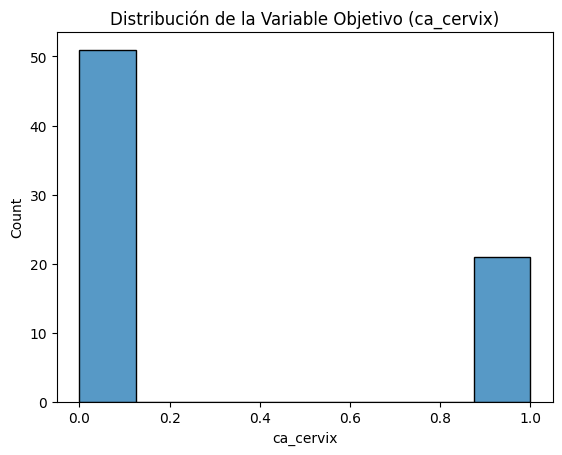

In [42]:
sns.histplot(cervical_data['ca_cervix'])
plt.title('Distribución de la Variable Objetivo (ca_cervix)')
plt.show()

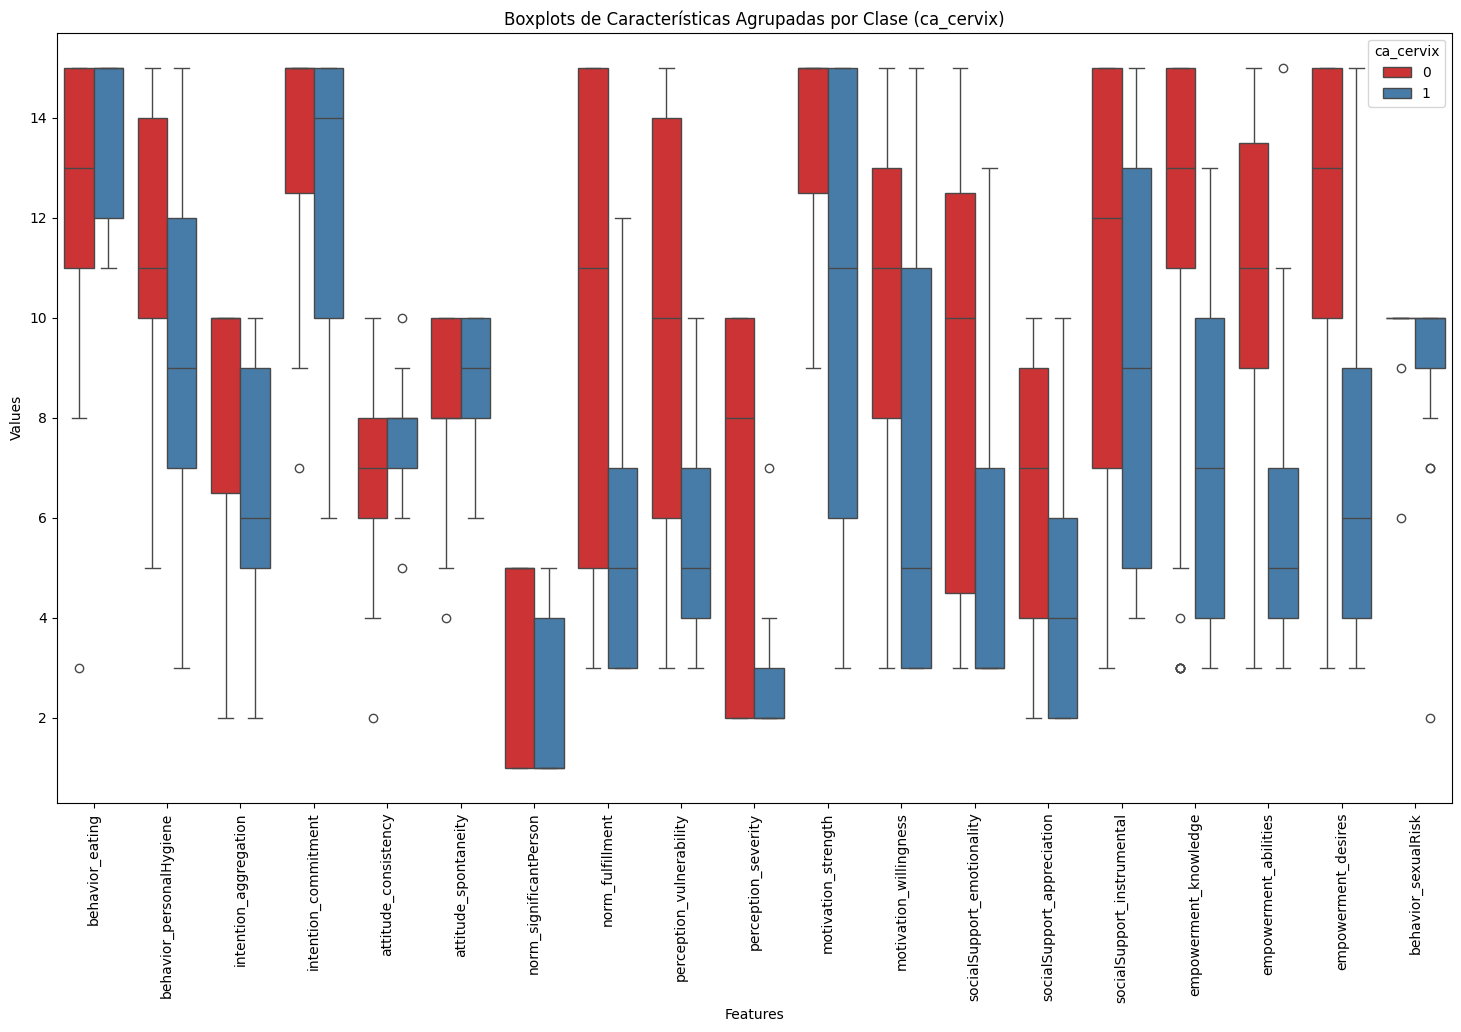

In [43]:
# Boxplot para ver cómo varían las características según la clase objetivo
plt.figure(figsize=(18, 10))
df_melted = pd.melt(cervical_data, id_vars='ca_cervix', var_name='Features', value_name='Values')
sns.boxplot(x='Features', y='Values', hue='ca_cervix', data=df_melted, palette='Set1')
plt.xticks(rotation=90)
plt.title('Boxplots de Características Agrupadas por Clase (ca_cervix)')
plt.show()

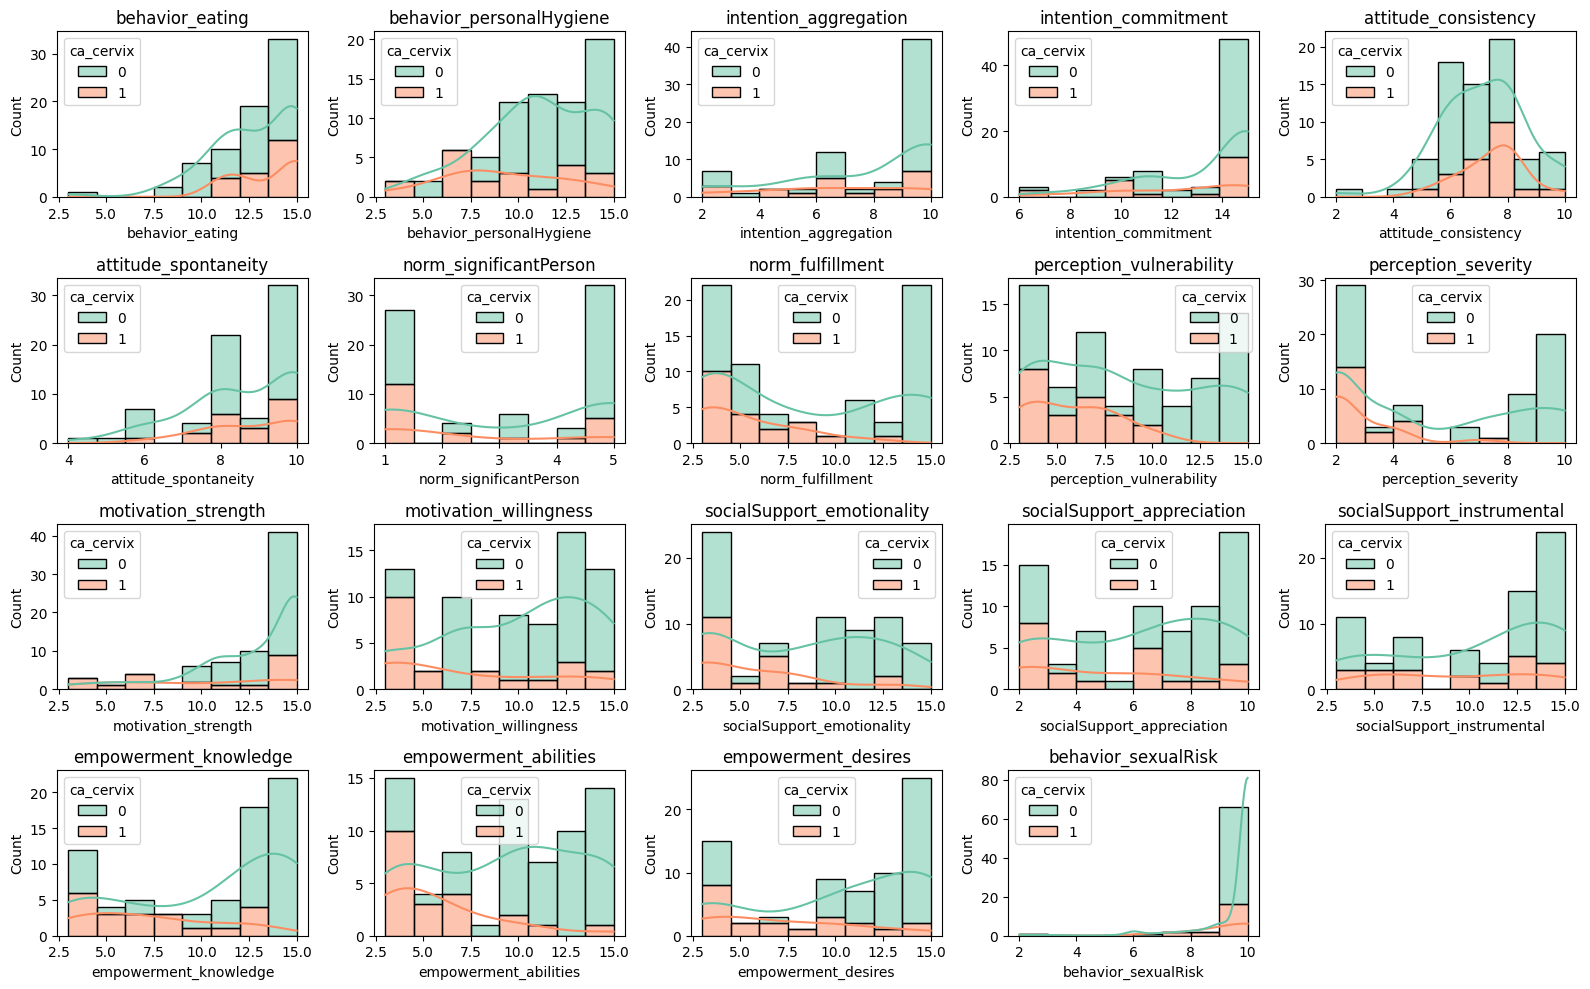

In [44]:
# Histogramas de las características por clase de la variable objetivo
plt.figure(figsize=(16, 10))
for i, column in enumerate(cervical_data.columns[:-1]):
    plt.subplot(4, 5, i+1)  
    sns.histplot(data=cervical_data, x=column, hue='ca_cervix', multiple='stack', kde=True, palette='Set2')
    plt.title(column)
    plt.tight_layout()

plt.show()

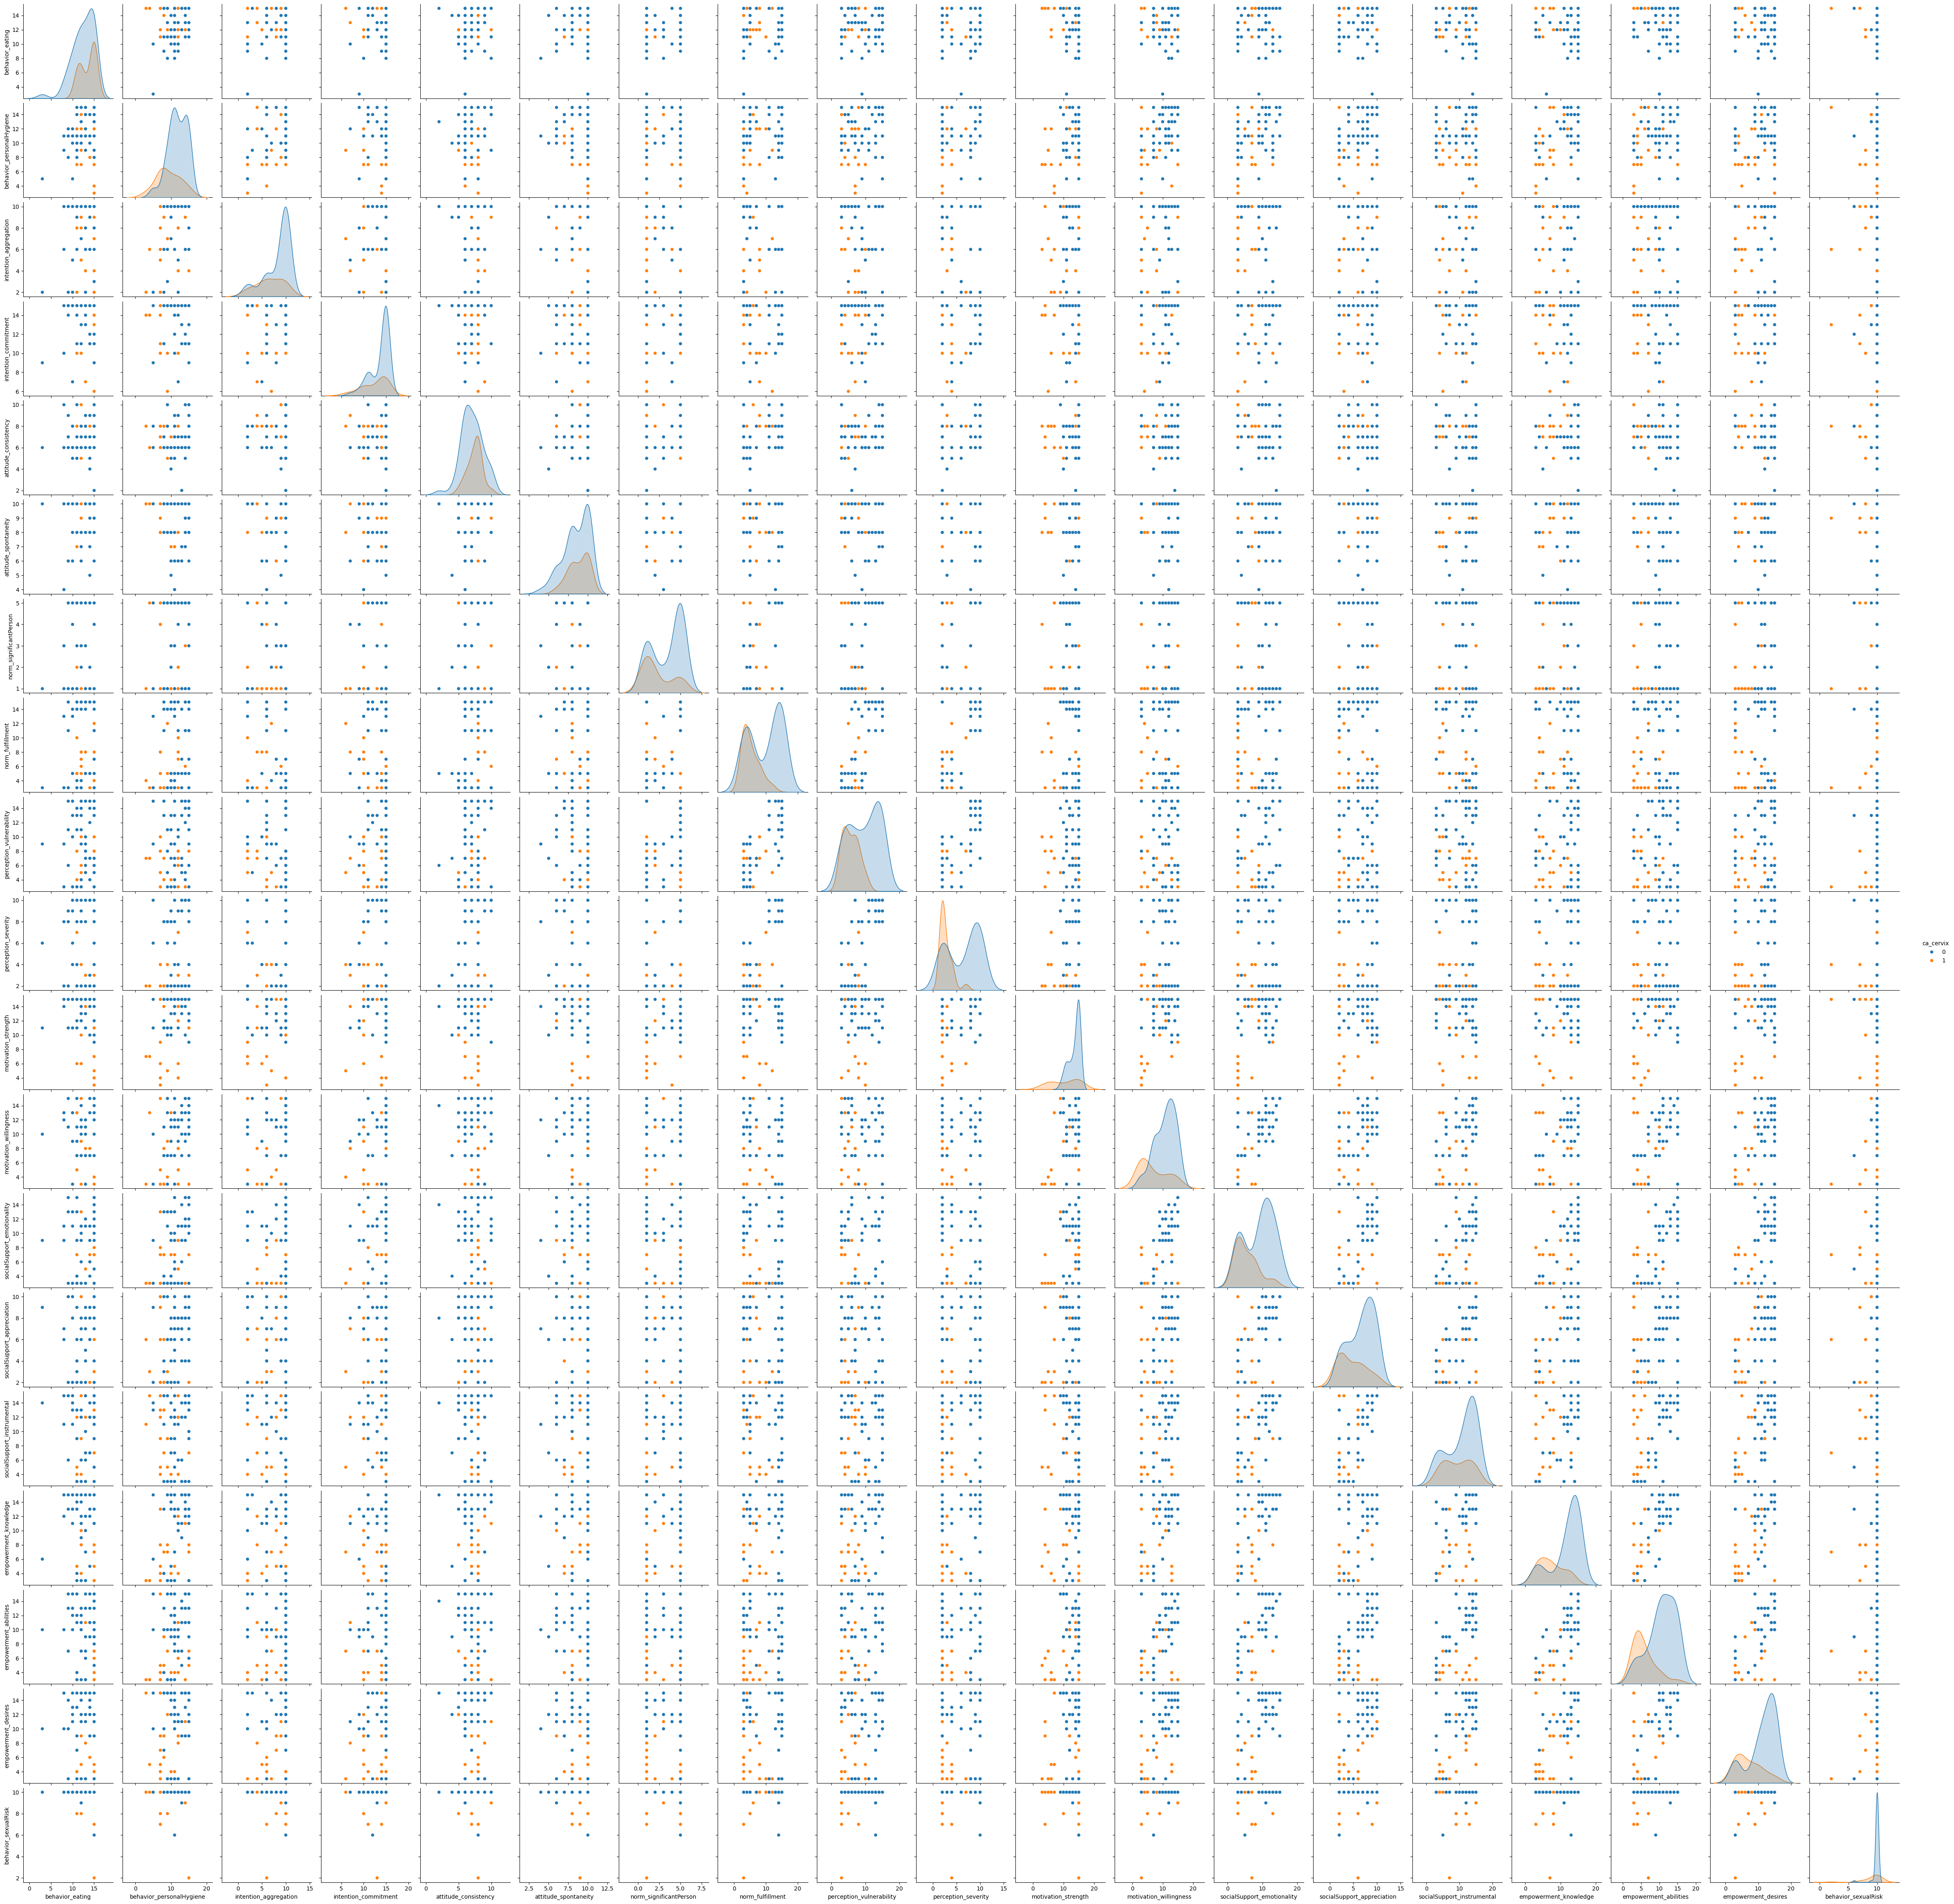

In [45]:

sns.pairplot(cervical_data, hue="ca_cervix")

In [46]:
print('Sesgo para cada una de las variables: ')
cervical_data.skew()

Sesgo para cada una de las variables: 


behavior_eating              -1.288417
behavior_personalHygiene     -0.495665
intention_aggregation        -1.025822
intention_commitment         -1.323381
attitude_consistency         -0.314268
attitude_spontaneity         -0.854840
norm_significantPerson       -0.119447
norm_fulfillment              0.200643
perception_vulnerability      0.224658
perception_severity           0.270296
motivation_strength          -1.467241
motivation_willingness       -0.387659
socialSupport_emotionality    0.054630
socialSupport_appreciation   -0.209869
socialSupport_instrumental   -0.515717
empowerment_knowledge        -0.607618
empowerment_abilities        -0.142479
empowerment_desires          -0.542501
behavior_sexualRisk          -4.726348
ca_cervix                     0.936319
dtype: float64

#### **Limpieza de Outliers bajo el criterio IQR**

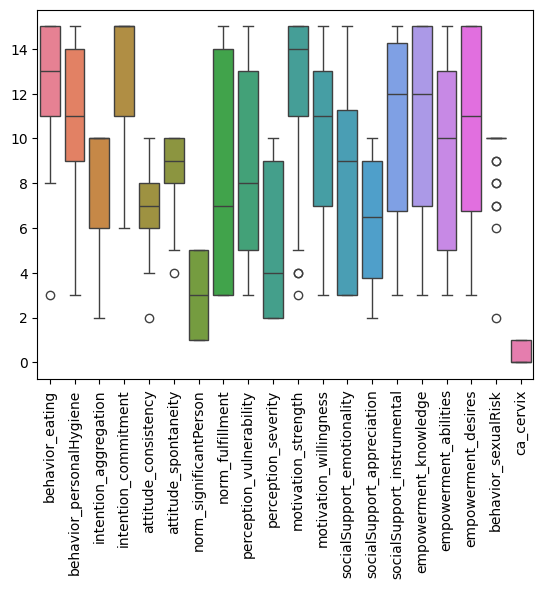

In [47]:

# determinar columnas con valores numericos
numeric_columns = cervical_data.select_dtypes(include='number').columns

#se grafican las variables en un boxplot para ver si hay valores atipicos
sns.boxplot(data=cervical_data[numeric_columns])
plt.xticks(rotation=90)
plt.show()

Del grafico anterior puede observarse que efectivamenete, si hay outliers en el dataset, por lo que se procede a eliminarlos

In [48]:


# calcualr el IQR para cada columna
Q1 = cervical_data[numeric_columns].quantile(0.25)
Q3 = cervical_data[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

# calcula los limites inferiores y superiores
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# se determina una df the valores booleanos: True si es un outlier, False si no
outliers = ((cervical_data[numeric_columns] < lower_bound) | (cervical_data[numeric_columns] > upper_bound))

#se usa el df de booleanos para filtrar los outliers
cleaned_data = cervical_data[~outliers.any(axis=1)]

print('Dimensión de datos antes de limpieza:',cervical_data.shape)
print('Dimensión de datos después de limpieza:',cleaned_data.shape)

Dimensión de datos antes de limpieza: (72, 20)
Dimensión de datos después de limpieza: (59, 20)


### **2.2 Aplicar técnicas de preprocesamiento como normalización, codificación de variables categóricas y reducción de dimensionalidad.**


#### **Preprocesamiento de informacion**

In [49]:
import numpy as np

# Definir las listas de columnas para cada tipo de transformación
log_transform_columns = [
    'behavior_eating', 
    'intention_aggregation', 
    'intention_commitment', 
    'motivation_strength', 
    'behavior_sexualRisk'
]

sqrt_transform_columns = [
    'attitude_spontaneity', 
    'behavior_personalHygiene', 
    'socialSupport_appreciation', 
    'socialSupport_instrumental', 
    'empowerment_knowledge', 
    'empowerment_abilities', 
    'empowerment_desires'
]


cervical_normalized = cleaned_data.copy()

# Transformación logarítmica: Reduce el impacto de valores extremos. Ideal para variables con sesgo positivo.

cervical_normalized[log_transform_columns] = cervical_normalized[log_transform_columns].apply(np.log1p)

# Transformación de raíz cuadrada: Similar a la logarítmica, pero menos agresiva. Funciona bien para variables con valores más pequeños o negativos con sesgo positivo o negativo.
cervical_normalized[sqrt_transform_columns] = cervical_normalized[sqrt_transform_columns].apply(np.sqrt)

cervical_normalized.head()


,behavior_eating,behavior_personalHygiene,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,behavior_sexualRisk,ca_cervix
0,2.639057,3.464102,1.609438,2.079442,9,3.162278,1,8,7,3,2.708050,8,5,2.645751,3.464102,3.464102,3.316625,2.828427,2.397895,1
1,2.484907,3.316625,2.397895,2.708050,7,2.645751,5,5,4,2,2.772589,13,7,2.449490,2.236068,2.236068,2.000000,2.000000,2.397895,1
2,2.772589,1.732051,1.098612,2.708050,8,3.162278,1,4,7,2,2.079442,3,3,2.449490,3.316625,1.732051,1.732051,3.872983,2.397895,1
3,2.484907,3.162278,2.397895,2.772589,7,2.645751,1,5,4,2,2.772589,13,7,2.000000,2.000000,2.000000,2.000000,2.000000,2.397895,1
5,2.708050,2.828427,1.945910,2.772589,8,3.162278,1,3,4,2,2.708050,8,7,1.414214,2.645751,3.605551,3.000000,2.449490,2.397895,1


**Transformación Logarítmica (np.log1p):** Aplicada a variables con sesgo fuerte negativo o positivo (behavior_eating, intention_aggregation, intention_commitment, motivation_strength, behavior_sexualRisk). Esta transformación es adecuada cuando los datos tienen colas largas o valores extremadamente altos, ya que comprime los valores grandes y reduce la asimetría.

**Transformación de Raíz Cuadrada (np.sqrt):** Aplicada a variables con sesgo negativo moderado (attitude_spontaneity, behavior_personalHygiene, socialSupport_appreciation, etc.). Esta transformación es útil para reducir el sesgo sin comprimir tanto los valores como la transformación logarítmica, y es adecuada para variables con sesgo más leve.

**Sin Transformación:** Variables con sesgo cercano a 0 (norm_significantPerson, norm_fulfillment, perception_vulnerability, etc.) no requieren transformación, ya que sus distribuciones son casi simétricas y no necesitan ajustes.

#### **Análisis de componentes que explican al menos el 90% de la varianza**

In [50]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(cervical_normalized.drop(columns=['ca_cervix']))  # Excluir la variable objetivo

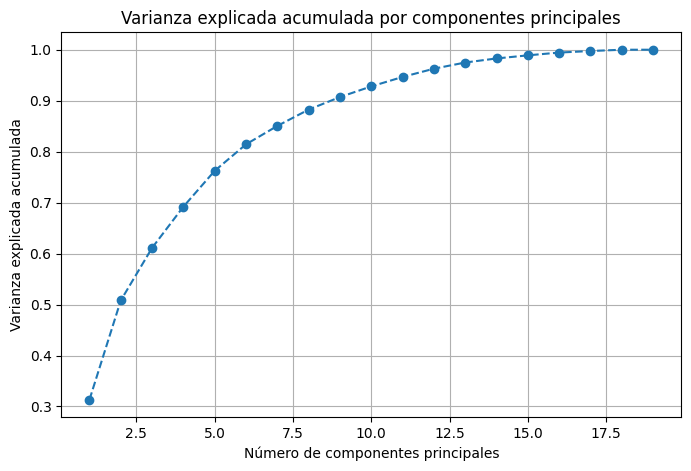

Número de componentes que explican al menos el 90.0% de la varianza: 9


In [51]:

# Aplicar PCA
pca = PCA().fit(X_scaled)

# Calcular la varianza explicada acumulada
explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Visualizar la varianza explicada acumulada
plt.figure(figsize=(8,5))
plt.plot(range(1, len(explained_variance) + 1), explained_variance, marker='o', linestyle='--')
plt.xlabel('Número de componentes principales')
plt.ylabel('Varianza explicada acumulada')
plt.title('Varianza explicada acumulada por componentes principales')
plt.grid(True)
plt.show()

# Elegir el número de componentes que explican al menos el 90% de la varianza
threshold = 0.90
num_components = np.argmax(explained_variance >= threshold) + 1
print(f"Número de componentes que explican al menos el {threshold*100}% de la varianza:", num_components)


In [52]:
pca = PCA(n_components=11)  # Número de componentes principales
X_pca = pca.fit_transform(X_scaled)

# 4. Inspeccionar los componentes principales
print("Varianza explicada por cada componente:",  np.cumsum(pca.explained_variance_ratio_))

Varianza explicada por cada componente: [0.31328237 0.50797803 0.61121516 0.69202635 0.76243726 0.81442212
 0.85049075 0.88253568 0.90713645 0.92803693 0.94657562]


**Nota: Se aplicara PCA para reducir la dimensionalidad de nuestra X , seleccionando aquellas que expliquen al menos el 90% de la varianza**

In [53]:
# Crear un DataFrame con los componentes principales
pca_columns = [f'PC{i+1}' for i in range(X_pca.shape[1])]  # Nombrar los componentes como PC1, PC2, etc.
df_pca = pd.DataFrame(X_pca, columns=pca_columns)
df_pca['y'] = cervical_normalized['ca_cervix'].values
df_pca.head()  

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,y
0,-0.080210,-1.108278,-1.624708,-1.214871,1.684364,-1.940335,-1.104938,-0.750093,-0.605830,0.804131,1.301633,1
1,-1.546886,-0.740141,2.751993,0.179278,0.281148,0.105705,1.348768,0.193577,-0.745378,1.123477,0.318747,1
2,-3.203864,-3.330521,-3.517649,-0.156601,-1.112844,0.927016,0.451464,1.679714,-0.541618,-0.529265,0.630750,1
3,-1.954660,-1.692672,2.697981,0.582395,0.093625,-0.285106,1.002841,0.035854,0.311578,0.005974,1.226943,1
4,-1.188021,-2.143462,-0.519393,1.759908,0.366453,-0.770509,-0.349729,-0.366092,0.385660,0.442918,-0.142629,1


In [54]:
#finalmente se guarda el dataset limpio y normalizado
df_pca.to_csv(r"C:\tmp_cases\DEV\mlops\MLOps\MNA-MLOps-\Data\data.csv", index=False)

# **3.Versionado de datos**

**Tarea:** Aplicar técnicas de versionado de datos para asegurar reproducibilidad y trazabilidad.

**Instrucciones:**

- Utilizar herramientas de versionado de datos para mantener un registro de cambios y versiones de los conjuntos de datos utilizados.
- Documentar todas las modificaciones realizadas en los datos.

**Importancia:** El versionado de datos es esencial para la reproducibilidad de los experimentos y para mantener un historial detallado del manejo de los datos.

In [55]:
#instalar dvc para versionar el dataset
#!pip install dvc

In [56]:
#se inicializa el repositorio
!dvc init

ERROR: failed to initiate DVC - '.dvc' exists. Use `-f` to force.


In [57]:
!dvc add data

⠋ Checking graph

ERROR: output 'data' does not exist: [WinError 2] El sistema no puede encontrar el archivo especificado: 'c:/Users/Comunicaciones 6/Documents/Andru/Eq_34/MNA-MLOps-/data'


In [58]:
!git add data.dvc .gitignore
!git commit -m "Track dataset using DVC"

On branch main
Your branch is up to date with 'origin/main'.

nothing to commit, working tree clean


En el futuro si el dataset cambio se puede actualizar con los siguientes comandos:

dvc add data/

git add data.dvc

git commit -m "Updated dataset with new data"


**Versionado de datos usando mlflow**

In [59]:
#mlflow set up
mlflow.set_tracking_uri("http://localhost:5000")
mlflow.set_experiment(f"/user/test")

<Experiment: artifact_location='mlflow-artifacts:/1', creation_time=1728628311411, experiment_id='1', last_update_time=1728628311411, lifecycle_stage='active', name='/user/test', tags={}>

# **4.Construcción, ajuste y evaluación de Modelos de Machine Learning**

**Tarea:** Construir, ajustar y evaluar modelos de Machine Learning utilizando técnicas y algoritmos apropiados.

**Instrucciones:**

- Seleccionar algoritmos de Machine Learning adecuados para resolver el problema planteado.
- Entrenar los modelos utilizando los datos preprocesados.
- Realizar ajustes de hiperparámetros para optimizar el rendimiento del modelo.
- Evaluar los modelos utilizando métricas de rendimiento específicas.

**Importancia:** Esta etapa es fundamental para desarrollar modelos precisos y eficientes que puedan resolver problemas específicos de manera efectiva.

**Experimento 1 de Mlflow usando Regresión Logística**

In [60]:
X = df_pca.iloc[:,0:-1]
y = df_pca.iloc[:, -1]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X ,y, test_size = 0.30, random_state = 4, shuffle=True)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.50, random_state = 5, shuffle=True)


**4.1:** Modelo usando regresion logistica 

c:\Users\Comunicaciones 6\Documents\Andru\Eq_34\MNA-MLOps-\mlops_venv\lib\site-packages\sklearn\linear_model\_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
2024/10/11 01:33:51 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Confusion matrix


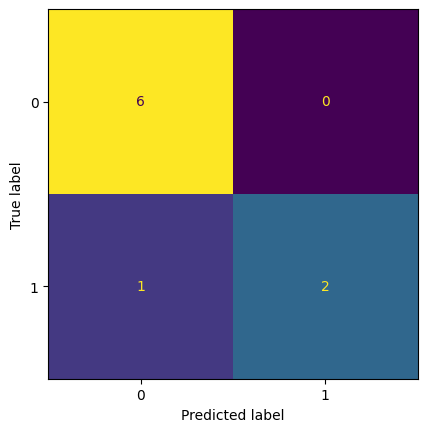

2024/10/11 01:33:52 INFO mlflow.tracking._tracking_service.client: 🏃 View run blushing-shoat-637 at: http://localhost:5000/#/experiments/1/runs/eb11df67974e4c72ba755b5235da83e6.
2024/10/11 01:33:52 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.


                         precision    recall  f1-score   support

without cervical cancer       0.86      1.00      0.92         6
   with cervical cancer       1.00      0.67      0.80         3

               accuracy                           0.89         9
              macro avg       0.93      0.83      0.86         9
           weighted avg       0.90      0.89      0.88         9



In [62]:
with mlflow.start_run() as run:
    
    #definicion de hyperparametros como variables
    solver = 'liblinear'
    multi_class = 'ovr'
    
    mlflow.log_param("solver" , solver)
    mlflow.log_param("multi_class", multi_class)
    
    #Creacion de la instancia del modelo
    reg_log = LogisticRegression(random_state=10, solver=solver, multi_class=multi_class)

    #model fit
    reg_log.fit(X_train, y_train)

    #Predicciones usando set de evaluacion 
    y_pred_val = reg_log.predict(X_val)
    
    mlflow.sklearn.log_model(reg_log, "model")
    #Evaluación del modelo
    cnf_matrix = metrics.confusion_matrix(y_val, y_pred_val)
  
    print("Confusion matrix")
    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix) 
    disp.plot(colorbar = False, cmap='viridis') 
    plt.show()
    
    target_names = ['without cervical cancer', 'with cervical cancer']
    print(classification_report(y_val, y_pred_val, target_names=target_names, zero_division=0.0))
    report = classification_report(y_val, y_pred_val, target_names=target_names, zero_division=0.0, output_dict=True)
    mlflow.log_metric("Accuracy",report['accuracy'])
    mlflow.log_metric("Presicion",report['macro avg']['precision'])
    mlflow.log_metric("Recall",report['macro avg']['recall'])
    mlflow.log_metric("F1 score",report['macro avg']['f1-score'])
    

**4.2:** Modelo usando Árbol de Decisión

2024/10/11 01:33:55 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


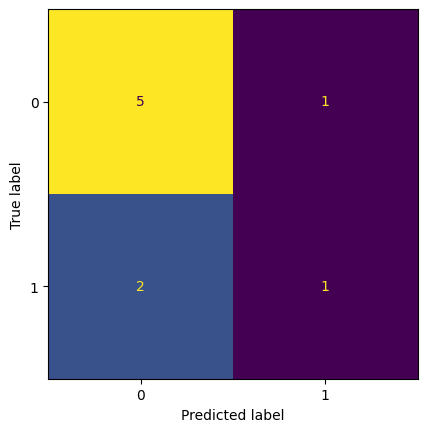

2024/10/11 01:33:55 INFO mlflow.tracking._tracking_service.client: 🏃 View run omniscient-loon-661 at: http://localhost:5000/#/experiments/1/runs/fce029a5562b4c7a9367ad1e99a80359.
2024/10/11 01:33:55 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.


                         precision    recall  f1-score   support

without cervical cancer       0.71      0.83      0.77         6
   with cervical cancer       0.50      0.33      0.40         3

               accuracy                           0.67         9
              macro avg       0.61      0.58      0.58         9
           weighted avg       0.64      0.67      0.65         9



In [63]:

with mlflow.start_run() as run:
    
    #definicion de hyperparametros como variables
    criterion = "entropy"
    max_depth = 3

    mlflow.log_param("criterion", criterion)
    mlflow.log_param("max_depth", max_depth)

    # Crear el objeto Decision Tree classifer
    clf = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state= 10)

    # entrenamiento del modelo
    clf = clf.fit(X_train,y_train)

    #Predicción usando el set de validación
    y_pred_val_tree = clf.predict(X_val)

    mlflow.sklearn.log_model(clf, "model")


    cnf_matrix_tree = metrics.confusion_matrix(y_val, y_pred_val_tree)
    disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_tree) 
    disp.plot(colorbar = False, cmap='viridis') 
    plt.show()
    target_names = ['without cervical cancer', 'with cervical cancer']
    print(classification_report(y_val, y_pred_val_tree, target_names=target_names, zero_division=0.0))
    report_tree = classification_report(y_val, y_pred_val_tree, target_names=target_names, zero_division=0.0, output_dict=True)
    mlflow.log_metric("Accuracy",report_tree['accuracy'])
    mlflow.log_metric("Presicion",report_tree['macro avg']['precision'])
    mlflow.log_metric("Recall",report_tree['macro avg']['recall'])
    mlflow.log_metric("F1 score",report_tree['macro avg']['f1-score'])


**4.3:** Modelo usando XGBoost - Método de ML supervisado para Clasificación y Regresión

Al igua que el anterior, este método se basa en *"árboles de decisión y supone una mejora sobre otros métodos, como el bosque aleatorio y refuerzo de gradientes. Funciona bien con datasets grandes y complejos al utilizar varios métodos de optimización."*

**XGBoost** emplea varios parámetros y métodos para optimizar su algoritmo, logrando así mejores resultados y un mayor rendimiento:

> **Regularización**: Se introduce un parámetro de regularización (lambda) al calcular las similitudes, lo que ayuda a reducir la sensibilidad a datos específicos y a prevenir el sobreajuste.

> **Poda de árboles**: Se utiliza un parámetro de complejidad (gamma) para evaluar las ganancias en las ramas de los árboles. Si la ganancia es menor que el valor gamma, se podan las ramas, lo que ayuda a evitar el sobreajuste y limita la profundidad del árbol.

> **Cuantiles ponderados**: En lugar de evaluar todos los valores posibles como umbrales de división, se seleccionan cuantiles ponderados utilizando un algoritmo de boceto. Este proceso estima distribuciones en sistemas distribuidos a través de redes.

> **Paralelización del aprendizaje**: Los datos se dividen en bloques, permitiendo que los cálculos, como la construcción de árboles, se realicen en paralelo, acelerando el proceso.

> **Manejo de datos escasos**: XGBoost aborda la falta de datos evaluando ambas direcciones de una división y determinando una dirección predeterminada basada en la ganancia obtenida.

> **Uso eficiente de la memoria caché**: El sistema aprovecha la memoria caché para calcular las puntuaciones y valores, lo que acelera los cálculos en comparación con el uso de la memoria principal.

> **Cómputo en bloques para grandes volúmenes de datos**: Para datasets que no caben en la memoria o caché, los datos se dividen y comprimen en bloques, lo que permite descomprimirlos de manera eficiente en la memoria principal. En casos donde los datos deben repartirse entre discos duros, se utiliza una técnica llamada fragmentación.

In [64]:
#!pip install xgboost
import mlflow, mlflow.xgboost, xgboost as xgb
import warnings

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

In [65]:
with mlflow.start_run():
    params = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        "max_depth": 3,
        "learning_rate": 0.1,
        "n_estimators": 100
    }

    mlflow.log_params(params)

    y_train = y_train.squeeze()

    model = xgb.XGBClassifier()
    model.fit(X_train, y_train)
    
    # Verificar el tipo y las clases en y_train
    print(f"Type of y_train: {type(y_train)}")
    print(f"Unique classes in y_train: {set(y_train)}")
    
    # Entrenar el modelo
    reg_xgb = xgb.XGBClassifier(**params).fit(X_train, y_train)
    
    # Predicción
    y_pred_val = reg_xgb.predict(X_val)

    #Ejemplo
    input_1 = X_train.iloc[:1]
    
    # Registrar el modelo
    mlflow.xgboost.log_model(model, "model", input_example=input_1)
    
    # Calcular y registrar métricas
    accuracy = metrics.accuracy_score(y_val, y_pred_val)
    mlflow.log_metric("accuracy", accuracy)
    
    print(f"Accuracy: {accuracy}")
    print(metrics.classification_report(y_val, y_pred_val, target_names=['class 0', 'class 1']))

Type of y_train: <class 'pandas.core.series.Series'>
Unique classes in y_train: {0, 1}


2024/10/11 01:34:04 INFO mlflow.tracking._tracking_service.client: 🏃 View run flawless-wasp-577 at: http://localhost:5000/#/experiments/1/runs/91ce995eae0f40bb9023c168d98d531f.
2024/10/11 01:34:04 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/1.


Accuracy: 0.7777777777777778
              precision    recall  f1-score   support

     class 0       0.75      1.00      0.86         6
     class 1       1.00      0.33      0.50         3

    accuracy                           0.78         9
   macro avg       0.88      0.67      0.68         9
weighted avg       0.83      0.78      0.74         9



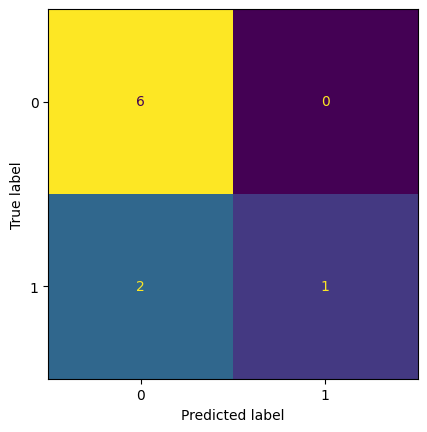

In [66]:
#print(f"Confusion Matrix:\n{metrics.confusion_matrix(y_val, y_pred_val)}")

cnf_matrix_tree = metrics.confusion_matrix(y_val, y_pred_val)
disp = ConfusionMatrixDisplay(confusion_matrix=cnf_matrix_tree) 
disp.plot(colorbar = False, cmap='viridis') 
plt.show()
    

# **5.Aplicación de Mejores Prácticas en el Pipeline de Modelado**

**Tarea:** Aplicar mejores prácticas en cada etapa del pipeline de modelado.

**Instrucciones:**

- Implementar pipelines de Machine Learning en donde se automaticen las tareas de preprocesamiento, entrenamiento y evaluación.
- Documentar cada paso del pipeline para asegurar claridad y reproducibilidad.

**Importancia:** Las mejores prácticas garantizan que el proceso de modelado sea eficiente, reproducible y escalable.

# **6.Estructuración y Refactorización del Código**

**Tarea:** Estructurar modelos de Machine Learning de manera organizada y aplicar principios de programación orientada a objetos.

**Instrucciones:**

- Organizar el código en módulos y funciones bien definidas.
- Aplicar principios de programación orientada a objetos para mejorar la estructura del código.
- Refactorizar el código existente para mejorar su eficiencia y mantenibilidad.

**Importancia:** Una buena estructuración y refactorización del código es esencial para el mantenimiento a largo plazo y la escalabilidad de los proyectos de Machine Learning.